<a href="https://colab.research.google.com/github/beedrumms/Exploring-Public-Responses-to-Government-COVID-19-Policies/blob/main/4)_B)_NY_EDA_of_Tweets_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load 

In [ ]:
# Explortory Analysis libraries
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime
import collections
from collections import Counter 
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

import sklearn 
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.util import ngrams

# Mounting google colab on drive 
from google.colab import drive, files
import os
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# download my dataset from my drive 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROCESSED_NEWYORK_COVID19_TWEETS.csv')    
tweets_df = data[['Datetime', 'Text', 'Text_Unprocessed']]
tweets_df.columns, tweets_df.shape # ensuring everthing read in properly

(Index(['Datetime', 'Text', 'Text_Unprocessed'], dtype='object'), (600020, 3))

In [ ]:
# Converting dates to datetime objects 
tweets_df['Datetime'] = pd.to_datetime(tweets_df['Datetime']) # converting to datetime
tweets_df['Datetime'] = tweets_df['Datetime'].dt.date # converting to just Year-Month-Day format 
tweets_df.Datetime.head(2), tweets_df.Datetime.tail(2)

# Visualize

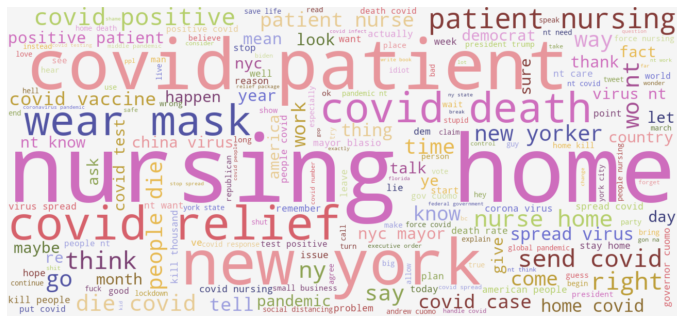

In [ ]:
# Looking again at the clean data word cloud we have some ideas of the themes people are talking about 
tweet_str = [] # Making string of tweet data
for t in tweets_df['Text']:
  tweet_str.append(t)
tweet_str = pd.Series(tweet_str).str.cat(sep=' ')

tweet_cloud = WordCloud(width=1300, height=600, max_font_size=200, background_color="whitesmoke", colormap="tab20b").generate(tweet_str) # creating the word cloud 
plt.figure(figsize=(12,10))
plt.imshow(tweet_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Looking at how many unique dates I have in the New York
print(tweets_df['Datetime'].nunique()) # 412 unique days (about 15 months if you divide by the average days in a month over the year (30.6))
import statistics
print(statistics.mean(tweets_df['Datetime'].value_counts())) # 1456.3592 tweets a day is the average
print(statistics.median(tweets_df['Datetime'].value_counts())) # 1018 tweets a day is the median 
print(max(tweets_df['Datetime'].value_counts())) # 7354
print(min(tweets_df['Datetime'].value_counts())) # 86

412
1456.3592233009708
1272.0
7354
86


In [ ]:
dates = tweets_df['Datetime'].value_counts() > 500 
dates_with_500_occurances = dates[dates == True]
dates_with_500_occurances # 343 dates have the min day requirment of 500 occurances

2020-09-03    True
2020-07-14    True
2020-07-13    True
2020-11-11    True
2020-04-29    True
              ... 
2021-05-03    True
2021-04-26    True
2020-09-19    True
2021-03-23    True
2021-04-07    True
Name: Datetime, Length: 343, dtype: bool

In [ ]:
# It aapears that there is a parsing issue resulting in a number of nan lines -- I will drop them for now 
is_na = tweets_df['Text'].isna()
is_nalist = tweets_df[is_na]
is_nalist

,Datetime,Text,Text_Unprocessed
11,2021-05-30,NaN,
210,2021-05-29,NaN,
4704,2021-05-17,NaN,
5608,2021-05-13,NaN,
6456,2021-05-11,NaN,
...,...,...,...
597863,2020-04-15,NaN,
598515,2020-04-15,NaN,
598602,2020-04-15,NaN,
599045,2020-04-15,NaN,


In [ ]:
is_not_na = tweets_df['Text'].notna()
tweets_df = tweets_df[is_not_na]
tweets_df

,Datetime,Text,Text_Unprocessed
0,2021-05-30,pandemic democrats republicans refuse work gra...,"During the pandemic, Democrats and Republic..."
1,2021-05-30,stand congress location discrimination policy ...,Stand up to the Congress Location Di...
2,2021-05-30,thank municipal bigwig vocal covid denial ceme...,No thanks to the municipal bigwig whose vocal...
3,2021-05-30,¡ president trump siempre estuvo en lo cierto ...,¡PRESIDENT TRUMP SIEMPRE ESTUVO...
4,2021-05-30,isyes school positivity rate peak covid winter...,It is....yes. School positivity rate has bee...
...,...,...,...
600015,2020-04-14,coronavirus tax change benefit millionaire inc...,in the next coronavirus bill please the tax...
600016,2020-04-14,agree facilitate remote voting ensure continui...,I agree with and must facilitate remote vo...
600017,2020-04-14,decide want death toll higher add death patien...,decided he wanted his death toll to be higher...
600018,2020-04-14,agree faciliate remote voting ensure continuit...,I agree with and must faciliate remote vot...


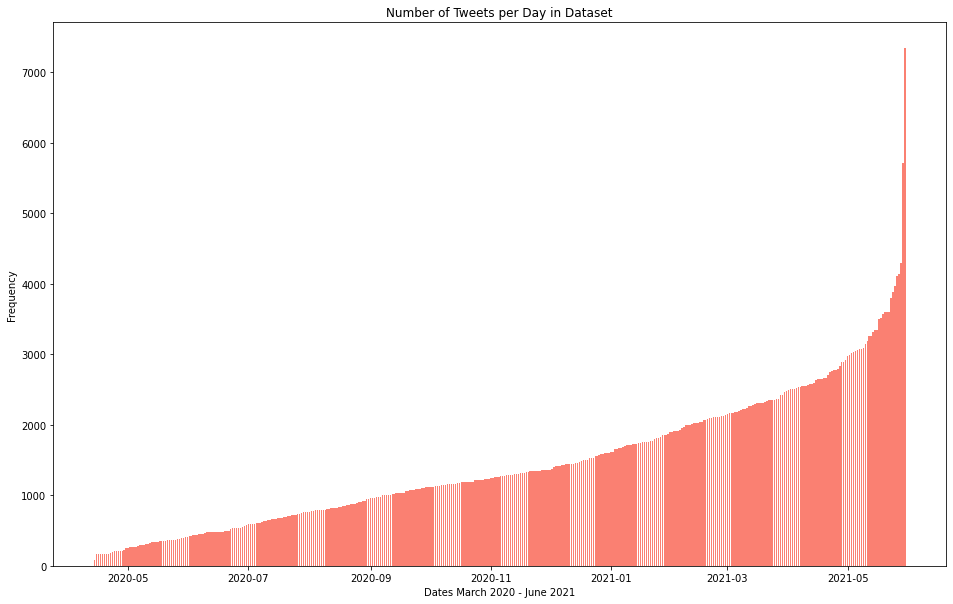

In [ ]:
# Visualizing the frequency of tweets per day
x_val = tweets_df['Datetime'].unique()
h_val = tweets_df['Datetime'].value_counts()
plt.bar(x = x_val, height = h_val, color = 'salmon')
plt.xlabel("Dates March 2020 - June 2021")
plt.ylabel("Frequency")
plt.title("Number of Tweets per Day in Dataset")
plt.rc('figure', figsize=(16,10))
plt.show()

In [ ]:
tweets_list = tweets_df['Text'].tolist()

# Tokenize
wordsy = [] 
for t in tweets_list:
  wordsy.append(str(t).split())

# Count word frequencies
tweet_stream = [item for sublist in wordsy for item in sublist]
word_counts = collections.Counter(tweet_stream)
word_counts.most_common(100)

[('covid', 344542),
 ('virus', 142631),
 ('nt', 140477),
 ('people', 115571),
 ('pandemic', 109246),
 ('home', 92787),
 ('do', 90701),
 ('trump', 67009),
 ('death', 66560),
 ('nursing', 65738),
 ('s', 61015),
 ('state', 56223),
 ('patient', 54160),
 ('need', 52425),
 ('new', 51669),
 ('know', 44968),
 ('cuomo', 44822),
 ('like', 44223),
 ('mask', 41833),
 ('die', 41772),
 ('ny', 41718),
 ('say', 39092),
 ('go', 37763),
 ('nyc', 35328),
 ('coronavirus', 34506),
 ('kill', 33562),
 ('get', 33377),
 ('work', 33148),
 ('spread', 31481),
 ('help', 31465),
 (')', 30895),
 ('test', 30274),
 ('relief', 30263),
 ('want', 30234),
 ('stop', 29996),
 ('you', 29850),
 ('send', 29780),
 ('time', 29668),
 ('re', 28111),
 ('governor', 28069),
 ('think', 28045),
 ('$', 28021),
 ('(', 27496),
 ('be', 25911),
 ('day', 25221),
 ('york', 25078),
 ('I', 24886),
 ('come', 24266),
 ('case', 24115),
 ('let', 23898),
 ('vaccine', 23877),
 ('care', 23403),
 ('right', 23084),
 ('m', 22873),
 ('positive', 22487),
 

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(tweets_list, 50)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 50 Unigrams"))
fig.show()

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(tweets_list, 50)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 50 Bigrams"))
fig.show()

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(tweets_list, 50)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 50 Trigrams"))
fig.show()

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(tweets_list, 25)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 25 Unigrams"))
fig.show()

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(tweets_list, 25)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 25 Bigrams"))
fig.show()

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(tweets_list, 25)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 25 Trigrams"))
fig.show()

In [ ]:
tweets_df.to_csv('/content/drive/MyDrive/Colab Notebooks/PROCESSED2_NEWYORK_COVID19_TWEETS.csv')